In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')
sns.set()
%matplotlib inline

In [2]:
' Read in income data file '
df_income = pd.read_csv("./Data/County level income data.csv",header=2)

' Extract sections '
dict_df_income = {}
for i in range(15):
    row = 1+(i*16)+i
    df = df_income.iloc[row:(row+16),1:39]
    df.set_index(' .1',inplace=True)
    df.index.name = 'Year'
    dict_df_income[i] = df
    
' Explicitly name important data frames '
df_income_per_person = dict_df_income[7]
df_disposable_income_per_person = dict_df_income[11]
df_disposable_income_per_person_ex_rent = dict_df_income[13]

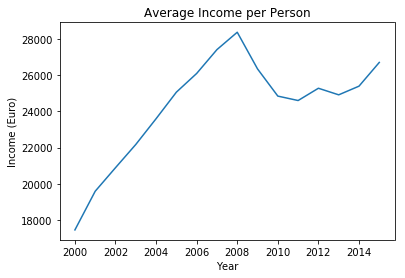

In [3]:
ax = df_income_per_person['State'].plot();
ax.set_title('Average Income per Person');
ax.set_ylabel('Income (Euro)');

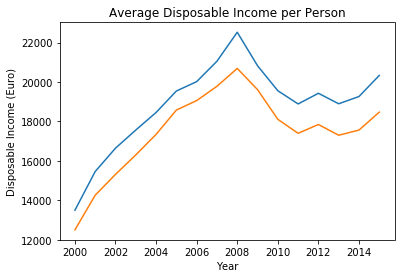

In [4]:
ax = df_disposable_income_per_person['State'].plot();
ax.set_title('Average Disposable Income per Person');
ax.set_ylabel('Disposable Income (Euro)');
df_disposable_income_per_person_ex_rent['State'].plot();

In [5]:
' Read in population data file '
df_pop = pd.read_csv("./Data/PopulationAndMigrationEstimates.csv")
df_pop.set_index('Year',inplace=True)

In [6]:
df_pop.head()

,Births,Deaths,Natural increase,Immigrants,Emigrants,Net migration,Population change,Population
Year,,,,,,,,
1987,61.2,32.2,29.0,17.2,40.2,-23.0,5.9,"3,546.5"
1988,57.8,31.6,26.2,19.2,61.1,-41.9,-15.8,"3,530.7"
1989,53.6,31.0,22.6,26.7,70.6,-43.9,-21.2,"3,509.5"
1990,51.9,32.8,19.1,33.3,56.3,-22.9,-3.7,"3,505.8"
1991,53.1,31.1,22.0,33.3,35.3,-2.0,19.9,"3,525.7"


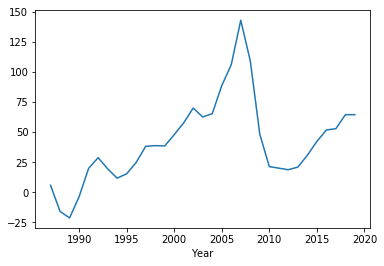

In [7]:
#df_pop['Natural increase'].plot();
#df_pop['Births'].plot();
#df_pop['Deaths'].plot();
#df_pop['Net migration'].plot();
df_pop['Population change'].plot();

In [8]:
' Read in Average Rent data file '
df_avg_rent = pd.read_csv("./Data/AvgMonthlyRent2008-2018.csv",header=2)

' Rename columns'
df_avg_rent.columns = ['Property Type','Num Bedrooms','Location','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

' Cut off bottom of file (which has text) '
df_avg_rent = df_avg_rent.iloc[0:18780,:]

In [9]:
df_avg_rent.head()

,Property Type,Num Bedrooms,Location,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Detached house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,One bed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,,Carlow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,,,Carlow Town,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,,,"Graiguecullen, Carlow",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
' Create dictionary of dataframes '
dict_df_avg_rent = {}
dict_df_avg_rent['Detached house'] = {}
dict_df_avg_rent['Semi detached house'] = {}
dict_df_avg_rent['Terrace house'] = {}
dict_df_avg_rent['Apartment'] = {}
dict_df_avg_rent['Other flats'] = {}
dict_df_avg_rent['All property types'] = {}

property_types = ['Detached house','Semi detached house','Terrace house','Apartment','Other flats','All property types']
bed_categories = ['One bed','Two bed','Three bed', '1 to 2 bed','1 to 3 bed','Four plus bed','All bedrooms']

propertyTypeIndex = []
for propertyType in property_types:
    propertyTypeIndex.append(df_avg_rent[df_avg_rent['Property Type']==propertyType].index[0])

for bedCategory in bed_categories:
    
    ' Retrieve all index values matching bed category '
    numBedIndexes = df_avg_rent[df_avg_rent['Num Bedrooms']==bedCategory].index
    
    for numBedIndex in numBedIndexes:
        
        ' Determine the property type that numBedIndex belongs to '
        propertyIndex = -1
        
        for i in range(len(propertyTypeIndex)-1):
            if numBedIndex > propertyTypeIndex[i] and numBedIndex < propertyTypeIndex[i+1]:
                propertyIndex = i
                
        if propertyIndex == -1:
            propertyIndex = len(propertyTypeIndex)-1
            
        ' Extract data into dataframe '
        dict_df_avg_rent[property_types[propertyIndex]][bedCategory] = df_avg_rent.iloc[(numBedIndex+1):(numBedIndex+447),2:14]


In [11]:
property_types

['Detached house',
 'Semi detached house',
 'Terrace house',
 'Apartment',
 'Other flats',
 'All property types']

In [12]:
bed_categories

['One bed',
 'Two bed',
 'Three bed',
 '1 to 2 bed',
 '1 to 3 bed',
 'Four plus bed',
 'All bedrooms']

In [13]:
dict_df_avg_rent['All property types']['All bedrooms'].head()

,Location,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
18334,Carlow,745.00,692.66,651.37,628.96,626.96,600.97,616.73,641.47,664.76,708.90,752.29
18335,Carlow Town,784.38,720.40,674.39,641.22,650.56,604.46,654.52,658.22,686.65,724.29,781.03
18336,"Graiguecullen, Carlow",754.20,702.53,649.78,614.64,601.84,604.03,585.57,594.62,633.20,702.06,752.27
18337,"Tullow, Carlow",717.01,665.34,608.97,582.98,578.09,560.82,552.75,576.33,612.69,660.98,699.98
18338,Cavan,579.96,532.71,481.70,459.54,450.75,452.06,449.91,469.64,509.14,545.00,573.27


In [14]:
' Extract COUNTY data for all property types '

counties = ['Carlow', 'Dublin', 'Wexford', 'Wicklow', 'Louth', 'Kildare', 'Meath', 'Westmeath', 'Kilkenny', 'Laois', 'Offaly', 'Longford', 'Clare', 'Cork', 'Kerry', 'Limerick', 'Tipperary', 'Waterford', 'Galway', 'Leitrim', 'Mayo', 'Roscommon', 'Sligo', 'Cavan', 'Donegal', 'Monaghan']

propertySizes = ['One bed','Two bed','Three bed','Four plus bed','All bedrooms']

dfCountyByNumBeds = {}

for numBeds in propertySizes:
    
    isCounty = dict_df_avg_rent['All property types'][numBeds]['Location'].isin(counties)

    dfCountyByNumBeds[numBeds] = dict_df_avg_rent['All property types'][numBeds][isCounty]
    
    dfCountyByNumBeds[numBeds].set_index('Location',inplace=True)



In [15]:
 dfCountyByNumBeds['One bed'].head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Location,,,,,,,,,,,
Carlow,591.28,557.92,511.89,486.67,467.23,443.23,433.64,466.07,492.97,516.75,542.40
Cavan,428.51,399.50,356.62,329.03,330.97,340.79,344.20,346.50,379.32,413.51,444.92
Clare,521.46,473.89,438.69,396.03,405.35,385.20,378.14,390.22,429.31,445.25,460.72
Cork,662.67,635.16,586.71,543.77,544.53,557.14,579.94,612.33,655.02,708.09,757.77
Donegal,434.07,401.53,376.17,347.95,336.91,328.97,341.60,350.89,376.29,406.98,426.64


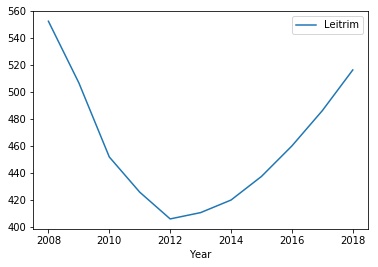

In [16]:
county = 'Leitrim'
df = dfCountyByNumBeds['All bedrooms'].loc[county].to_frame()
df.reset_index(inplace=True)
df.columns = ['Year',county]
df['Year'] = df['Year'].apply(lambda x:int(x))
df.plot(x='Year',y=county);

In [17]:
dfCountyByNumBeds['All bedrooms'].transpose()

Location,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,Kildare,Kilkenny,...,Meath,Monaghan,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
2008,745.00,579.96,696.22,910.85,577.66,1340.04,880.58,679.40,1014.96,776.46,...,907.46,635.33,701.91,623.82,656.41,680.96,704.22,676.42,707.32,1104.56
2009,692.66,532.71,642.95,845.58,550.94,1214.71,815.95,651.63,922.50,716.50,...,823.14,582.47,635.20,562.85,602.65,647.42,655.04,633.66,666.81,1016.62
2010,651.37,481.70,588.34,770.22,521.28,1076.98,792.32,590.72,824.46,644.92,...,727.15,528.57,579.45,513.65,600.09,600.67,591.59,590.21,621.92,914.71
2011,628.96,459.54,552.90,729.97,501.44,1047.36,741.92,558.69,789.13,604.56,...,693.03,512.29,549.51,497.13,607.59,576.53,584.73,586.96,592.94,861.33
2012,626.96,450.75,534.78,787.26,475.51,1078.83,756.89,565.37,779.79,601.71,...,683.28,512.95,540.65,480.00,575.51,558.96,570.77,534.67,569.15,845.39
2013,600.97,452.06,530.88,814.13,460.32,1115.85,772.95,559.15,789.84,600.29,...,688.38,503.76,538.96,464.70,623.81,544.62,557.50,541.41,561.79,854.75
2014,616.73,449.91,530.79,846.54,457.48,1178.24,810.06,558.69,844.79,612.69,...,723.21,504.34,548.54,475.64,700.57,551.89,561.58,546.07,567.03,898.26
2015,641.47,469.64,543.41,809.15,472.94,1281.06,882.10,628.07,921.90,647.54,...,799.21,515.21,574.67,484.14,806.75,561.13,575.94,620.08,581.20,956.21
2016,664.76,509.14,584.48,873.96,498.48,1371.92,986.29,615.01,997.77,700.16,...,884.69,541.91,599.50,498.04,632.15,575.40,610.41,630.44,612.87,1035.93
2017,708.90,545.00,624.71,937.20,527.95,1475.78,937.84,643.48,1064.75,741.45,...,976.64,579.56,635.94,532.42,660.90,603.23,667.50,678.07,649.53,1112.64


<Figure size 432x288 with 0 Axes>

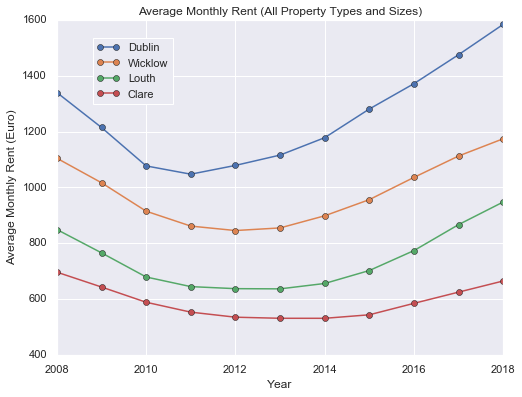

In [100]:
countyList = ['Dublin','Wicklow','Louth','Clare'];
plt.figure(); 
dfplot = dfCountyByNumBeds['All bedrooms'].transpose()[countyList];
dfplot.index = dfplot.index.astype(int);
ax = dfplot.plot(figsize=(8, 6),title='Average Monthly Rent (All Property Types and Sizes)',marker='o'); 
ax.set_xlabel('Year');
ax.set_ylabel('Average Monthly Rent (Euro)');
#plt.legend(loc='best');
ax.ticklabel_format(useOffset=False, style='plain')
plt.legend(bbox_to_anchor=(0.17, 0.75), loc=8, borderaxespad=0);
plt.savefig('./Figures/AvgMonthlyRentTOT.png')

In [19]:
df_minRent = {}

for numBeds in propertySizes:
    
    minRentList = []
    minYearList = []

    for county in counties:
        rentsForCounty = dfCountyByNumBeds[numBeds].loc[county]
        minRent = min(rentsForCounty)
        minYear = rentsForCounty[rentsForCounty==minRent].index[0]
        minRentList.append(minRent)
        minYearList.append(minYear)
    
    df_minRent[numBeds] = pd.DataFrame({'Year':minYearList,'minRent':minRentList})
    df_minRent[numBeds].index = counties

In [20]:
df_minRent['Three bed'].head()

,Year,minRent
Carlow,2013,601.21
Dublin,2011,1112.89
Wexford,2013,593.02
Wicklow,2012,870.47
Louth,2012,648.90


In [21]:
df_minRent['All bedrooms'].sort_values('minRent')
df_minRent['All bedrooms'].to_csv('./Figures/minYearForRent.csv')

In [22]:
' Average Rent (for all property sizes) in each county '
df_rent = dfCountyByNumBeds['All bedrooms'].transpose()
df_rent.rename_axis('Year',inplace=True)
df_rent.index = df_rent.index.astype(int);

' Add new column'
df_rent['DublinRentChange']=df_rent['Dublin']-df_rent['Dublin'].shift(1)

' Read in population/migration data file '
df_pop = pd.read_csv("./Data/PopulationAndMigrationEstimates.csv")
df_pop.set_index('Year',inplace=True)

' Read in Daft data '
df_daft = pd.read_csv("./Data/DaftAvailableRentalProperties2006-2019.csv")
df_daft['Year'] = df_daft['Date'].apply(lambda x:x[0:4])

Years = []
numAvailableProperties = []

for year in range(2006,2019):
    df = df_daft[df_daft['Year']==str(year)]
    Years.append(year)
    numAvailableProperties.append(int(df['Number of properties available for rent'].mean()))
    
df_available_properties = pd.DataFrame({'Year':Years,'Available Properties':numAvailableProperties})
df_available_properties.set_index('Year',inplace=True)

' Merge above three dataframes into one master dataframe '
mergedDf = df_pop.merge(df_rent, left_index=True, right_index=True)
df_master = mergedDf.merge(df_available_properties, left_index=True, right_index=True)

In [23]:
df_master

,Births,Deaths,Natural increase,Immigrants,Emigrants,Net migration,Population change,Population,Carlow,Cavan,...,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow,DublinRentChange,Available Properties
Year,,,,,,,,,,,,,,,,,,,,,
2008,73.0,28.0,44.9,113.5,49.2,64.3,109.2,"4,485.1",745.00,579.96,...,701.91,623.82,656.41,680.96,704.22,676.42,707.32,1104.56,NaN,13566
2009,75.3,28.6,46.7,73.7,72.0,1.6,48.3,"4,533.4",692.66,532.71,...,635.20,562.85,602.65,647.42,655.04,633.66,666.81,1016.62,-125.33,21928
2010,77.2,28.4,48.8,41.8,69.2,-27.5,21.4,"4,554.8",651.37,481.70,...,579.45,513.65,600.09,600.67,591.59,590.21,621.92,914.71,-137.73,19890
2011,75.1,27.7,47.5,53.3,80.6,-27.4,20.1,"4,574.9",628.96,459.54,...,549.51,497.13,607.59,576.53,584.73,586.96,592.94,861.33,-29.62,17645
2012,73.2,28.7,44.5,57.3,83.0,-25.7,18.8,"4,593.7",626.96,450.75,...,540.65,480.00,575.51,558.96,570.77,534.67,569.15,845.39,31.47,15979
2013,69.4,29.8,39.6,62.7,81.3,-18.7,21.0,"4,614.7",600.97,452.06,...,538.96,464.70,623.81,544.62,557.50,541.41,561.79,854.75,37.02,11254
2014,68.4,29.2,39.2,66.5,75.0,-8.5,30.8,"4,645.4",616.73,449.91,...,548.54,475.64,700.57,551.89,561.58,546.07,567.03,898.26,62.39,7312
2015,66.4,29.9,36.5,75.9,70.0,5.9,42.3,"4,687.8",641.47,469.64,...,574.67,484.14,806.75,561.13,575.94,620.08,581.20,956.21,102.82,4977
2016,65.4,29.8,35.6,82.3,66.2,16.2,51.8,"4,739.6",664.76,509.14,...,599.50,498.04,632.15,575.40,610.41,630.44,612.87,1035.93,90.86,3803


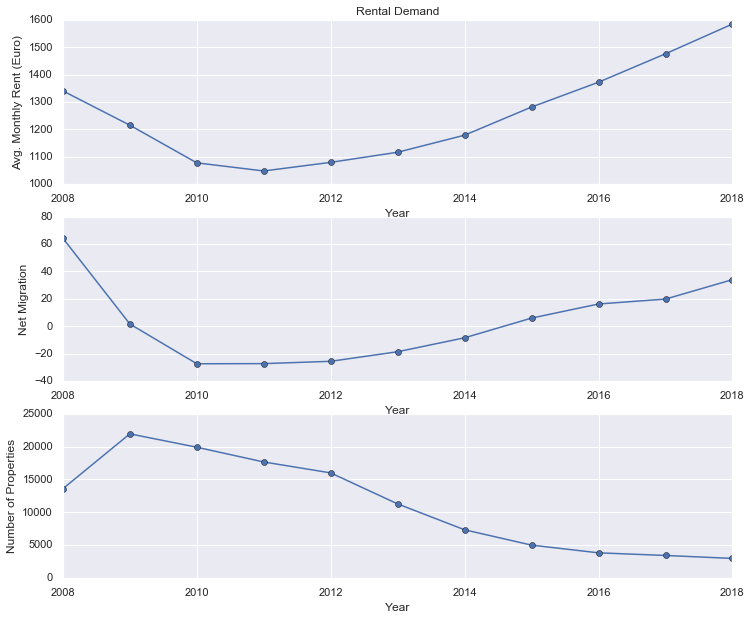

In [121]:
plt.subplot(3,1,1); 
dfplot = df_master
dfplot.index = dfplot.index.astype(int);
ax = dfplot['Dublin'].plot(figsize=(12, 10),title='Rental Demand',marker='o'); 
ax.set_ylabel('Avg. Monthly Rent (Euro)');
ax.ticklabel_format(useOffset=False, style='plain')

plt.subplot(3,1,2); 
ax = dfplot['Net migration'].plot(figsize=(12, 10),marker='o'); 
ax.set_ylabel('Net Migration');
ax.ticklabel_format(useOffset=False, style='plain')

plt.subplot(3,1,3); 
ax = dfplot['Available Properties'].plot(figsize=(12, 10),marker='o'); 
ax.set_ylabel('Number of Properties');
ax.ticklabel_format(useOffset=False, style='plain')

#plt.legend(loc='best');
#plt.legend(bbox_to_anchor=(0.17, 0.75), loc=8, borderaxespad=0);
#plt.savefig('./Figures/AvgMonthlyRentTOT.png')

In [122]:
' Merge above three dataframes into one master dataframe '
df_pop_available_properties = df_pop.merge(df_available_properties, left_index=True, right_index=True)
df_pop_available_properties

,Births,Deaths,Natural increase,Immigrants,Emigrants,Net migration,Population change,Population,Available Properties
Year,,,,,,,,,
2006,61.2,27.0,34.2,107.8,36.0,71.8,106.0,"4,232.9",7545
2007,66.6,28.4,38.2,151.1,46.3,104.8,142.9,"4,375.8",5735
2008,73.0,28.0,44.9,113.5,49.2,64.3,109.2,"4,485.1",13566
2009,75.3,28.6,46.7,73.7,72.0,1.6,48.3,"4,533.4",21928
2010,77.2,28.4,48.8,41.8,69.2,-27.5,21.4,"4,554.8",19890
2011,75.1,27.7,47.5,53.3,80.6,-27.4,20.1,"4,574.9",17645
2012,73.2,28.7,44.5,57.3,83.0,-25.7,18.8,"4,593.7",15979
2013,69.4,29.8,39.6,62.7,81.3,-18.7,21.0,"4,614.7",11254
2014,68.4,29.2,39.2,66.5,75.0,-8.5,30.8,"4,645.4",7312


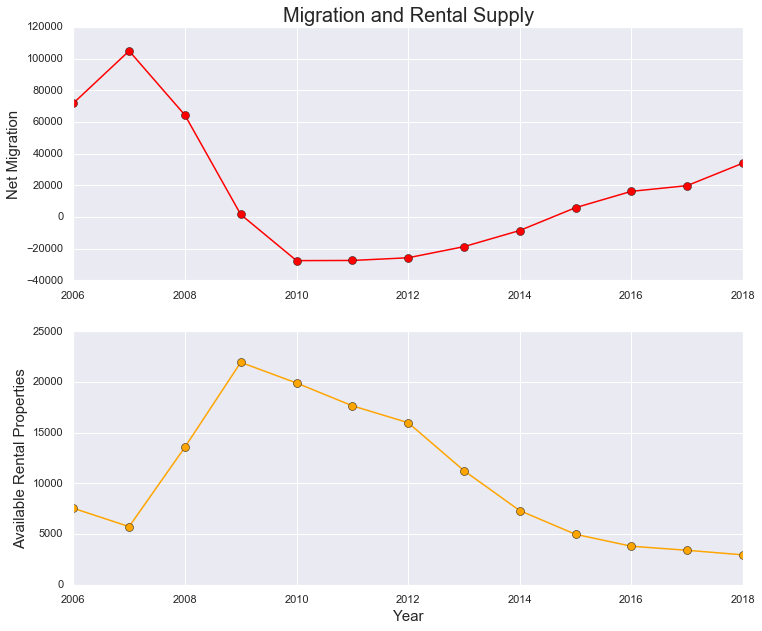

In [144]:
dfplot = df_pop_available_properties
dfplot.index = dfplot.index.astype(int);
dfplot['Net Mig'] = 1000*dfplot['Net migration']

plt.subplot(2,1,1); 
ax = dfplot['Net Mig'].plot(figsize=(12, 10),marker='o',color='red',markersize=8); 
ax.set_title('Migration and Rental Supply',fontsize=20)
ax.set_ylabel('Net Migration',fontsize=15);
ax.set_xlabel('');
ax.ticklabel_format(useOffset=False, style='plain')

plt.subplot(2,1,2); 
ax = dfplot['Available Properties'].plot(figsize=(12, 10),marker='o',color='orange',markersize=8); 
ax.set_ylabel('Available Rental Properties',fontsize=15);
ax.set_xlabel('Year',fontsize=15);
ax.ticklabel_format(useOffset=False, style='plain')

#plt.legend(loc='best');
#plt.legend(bbox_to_anchor=(0.17, 0.75), loc=8, borderaxespad=0);
plt.savefig('./Figures/MigrationVsRentalSupply.png')

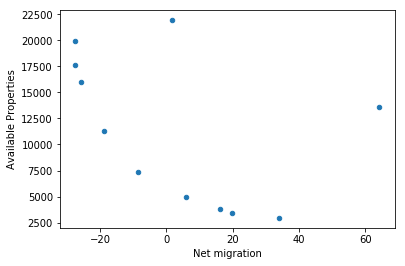

In [24]:
df_master.plot.scatter(x='Net migration',y='Available Properties');

In [25]:
df_master[['Net migration','Available Properties']]

,Net migration,Available Properties
Year,,
2008,64.3,13566
2009,1.6,21928
2010,-27.5,19890
2011,-27.4,17645
2012,-25.7,15979
2013,-18.7,11254
2014,-8.5,7312
2015,5.9,4977
2016,16.2,3803


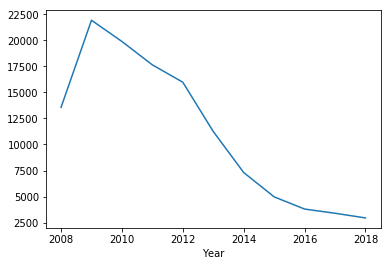

In [26]:
df_master['Available Properties'].plot();

In [27]:
df_available_properties

,Available Properties
Year,
2006,7545
2007,5735
2008,13566
2009,21928
2010,19890
2011,17645
2012,15979
2013,11254
2014,7312


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


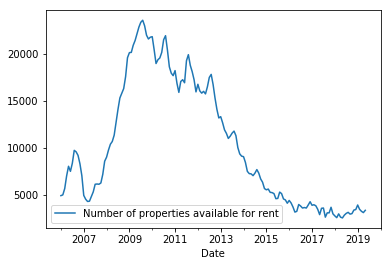

In [28]:
df_daft_monthly = df_daft[['Date','Number of properties available for rent']]
df_daft_monthly['Date'] =  pd.to_datetime(df_daft_monthly['Date'], format='%Y-%m-%d')
df_daft_monthly.set_index('Date',inplace=True)
df_daft_monthly.plot();

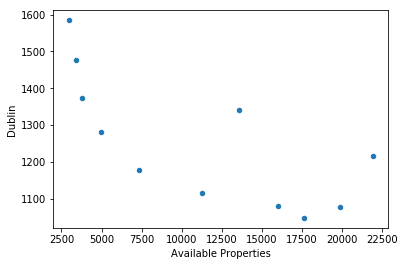

In [29]:
df_master.plot.scatter(x='Available Properties',y='Dublin');

In [30]:
' Exclude transition years 2008 and 2009 '
df_master_subset = df_master.iloc[2:]

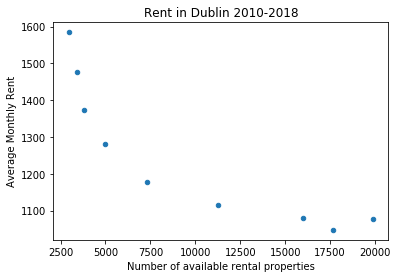

In [31]:
ax = df_master_subset.plot.scatter(x='Available Properties',y='Dublin');
ax.set_title('Rent in Dublin 2010-2018');
ax.set_xlabel('Number of available rental properties');
ax.set_ylabel('Average Monthly Rent');

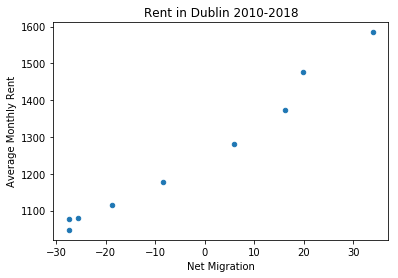

In [32]:
ax = df_master_subset.plot.scatter(x='Net migration',y='Dublin');
ax.set_title('Rent in Dublin 2010-2018');
ax.set_xlabel('Net Migration');
ax.set_ylabel('Average Monthly Rent');

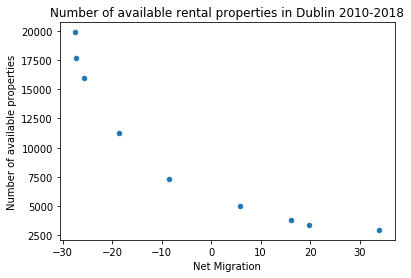

In [33]:
ax = df_master_subset.plot.scatter(x='Net migration',y='Available Properties');
ax.set_title('Number of available rental properties in Dublin 2010-2018');
ax.set_xlabel('Net Migration');
ax.set_ylabel('Number of available properties');

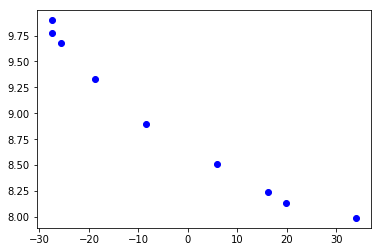

In [34]:
X=df_master_subset['Net migration'].values
Y=df_master_subset['Available Properties'].values

fig = plt.figure()
ax = plt.axes()
ax.plot(X,np.log(Y),'bo');

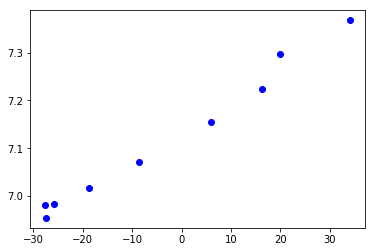

In [35]:
X=df_master_subset['Net migration'].values
Y=df_master_subset['Dublin'].values

fig = plt.figure()
ax = plt.axes()
ax.plot(X,np.log(Y),'bo');

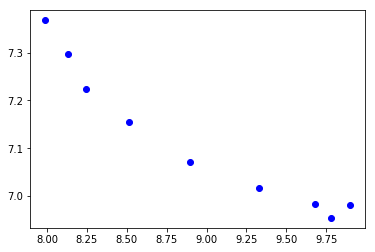

In [36]:
X=df_master_subset['Available Properties'].values
Y=df_master_subset['Dublin'].values

fig = plt.figure()
ax = plt.axes()
ax.plot(np.log(X),np.log(Y),'bo');

In [37]:
df_income_data = pd.read_csv('./Data/County level income data.csv',header=2)

In [38]:
' Rename columns '
columnNames = df_income_data.columns
columnNames = list(columnNames)
columnNames[0] = 'name'
columnNames[1] = 'Year'

oldNames = ['Cork City and County','Galway City and County','Limerick City and County','Waterford City and County','North Tipperary']
newNames = ['Cork','Galway','Limerick','Waterford','Tipperary']

for i in range(len(oldNames)):
    location = oldNames[i]
    for j in range(len(columnNames)):
        county = columnNames[j]
        if county == location:
            columnNames[j] = newNames[i]
            
df_income_data.columns = columnNames

In [39]:
dict_df_income = {}

' Extract data from dataframe '
for i in range(15):
    
    title = df_income_data['name'][i*17]
    dict_df_income[title] = df_income_data.iloc[((i*17)+1):(((i+1)*17)),1:]

In [40]:
dict_df_income.keys()

['Disposable Household Income (Euro Million)',
 'Disposable Income per Person (excluding Rent) (Euro)',
 'Index of Disposable Income per Person (State=100)',
 'Disposable Income per Person (Euro)',
 'Social Benefits and Other Current Transfers (Euro Million)',
 'Primary Income (Euro Million)',
 "Compensation of Employees (i.e. Wages and Salaries, Benefits in kind, Employers' social insurance contribution) (Euro Million)",
 'Current Taxes on Income (Euro Million)',
 'Total Household Income (Euro Million)',
 'Rent of dwellings (including imputed rent of owner-occupied dwellings) (Euro Million)',
 'Index of Total Income per Person (State=100)',
 'Income of Self Employed (Euro Million)',
 'Net Interest and Dividends (payments by households of interest are deducted from interest received by households) (Euro Million)',
 'Total Income per Person (Euro)',
 'Index of Disposable Income per Person (excluding Rent) (State=100)']

In [41]:
dict_df_income['Total Income per Person (Euro)']

,Year,State,West,Border,Mayo,Dublin,Cavan,Louth,Sligo,Laois,...,Westmeath,Roscommon,Tipperary,South Tipperary,Southern and Eastern,Cork,Galway,Limerick,Waterford,"Border, Midland and Western"
120,2000.0,17455.0,15422.0,14833.0,15197.0,20834.0,14730.0,17842.0,14625.0,15447.0,...,16775.0,15076.0,15423.0,14992.0,18257.0,16597.0,15640.0,16988.0,17160.0,15216.0
121,2001.0,19590.0,17080.0,16514.0,16707.0,23587.0,16393.0,20255.0,16395.0,16943.0,...,18848.0,16758.0,17873.0,16882.0,20550.0,18637.0,17372.0,19483.0,18673.0,16909.0
122,2002.0,20889.0,18297.0,17848.0,17717.0,24663.0,17672.0,21226.0,18523.0,18619.0,...,19952.0,18125.0,19067.0,18928.0,21840.0,20456.0,18666.0,20024.0,20641.0,18249.0
123,2003.0,22171.0,19850.0,19019.0,19082.0,25961.0,18941.0,22306.0,20108.0,20516.0,...,21904.0,19324.0,20281.0,20127.0,23065.0,21602.0,20417.0,21351.0,21581.0,19704.0
124,2004.0,23592.0,21413.0,20520.0,20363.0,27388.0,20905.0,23328.0,21827.0,22268.0,...,22485.0,20778.0,21591.0,21241.0,24478.0,23132.0,22167.0,22407.0,22972.0,21160.0
125,2005.0,25057.0,22842.0,21732.0,21540.0,28859.0,22749.0,24807.0,22710.0,23349.0,...,23448.0,22850.0,24263.0,21906.0,26009.0,24962.0,23572.0,23917.0,23883.0,22443.0
126,2006.0,26090.0,23499.0,22330.0,21583.0,29970.0,23566.0,25070.0,23199.0,24401.0,...,23558.0,23393.0,25391.0,23672.0,27197.0,25839.0,24603.0,25045.0,24270.0,23057.0
127,2007.0,27406.0,24527.0,23614.0,22462.0,31453.0,25518.0,26531.0,24511.0,25464.0,...,24382.0,23836.0,25988.0,25665.0,28606.0,27079.0,25866.0,26133.0,26048.0,24112.0
128,2008.0,28364.0,25901.0,24376.0,23692.0,32542.0,26026.0,27402.0,24930.0,26636.0,...,24989.0,25068.0,27186.0,26241.0,29558.0,28115.0,27355.0,26645.0,26432.0,25094.0
129,2009.0,26340.0,24468.0,22878.0,22706.0,30241.0,24239.0,25640.0,23780.0,24661.0,...,23382.0,23479.0,25236.0,24758.0,27379.0,26273.0,25711.0,24958.0,24143.0,23515.0


In [42]:
df_income = dict_df_income['Total Income per Person (Euro)']
df_income.set_index('Year',inplace=True)
df_income_counties = df_income[counties]

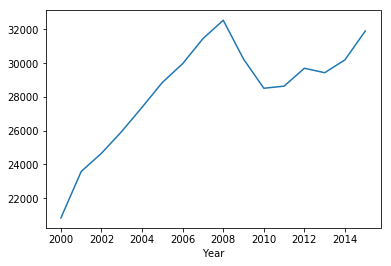

In [43]:
df_income_counties['Dublin'].plot();

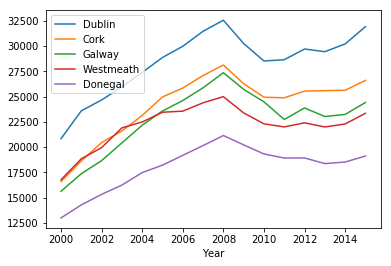

In [44]:
df_income_counties[['Dublin','Cork','Galway','Westmeath','Donegal']].plot();

In [45]:
' Combine income and average rent dataframes '
df_rent_income_counties = df_rent.merge(df_income_counties, left_index=True, right_index=True)

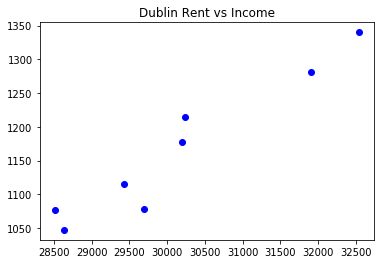

In [46]:
Y = df_rent_income_counties['Dublin_x'].values
X = df_rent_income_counties['Dublin_y'].values

fig = plt.figure()
ax = plt.axes()
ax.plot(X,Y,'bo');
ax.set_title('Dublin Rent vs Income');

In [47]:
' Calculate % of income spent on rent '
for county in counties:
    df_rent_income_counties[county+"_ratio"] = 100*(12*df_rent_income_counties[county+"_x"])/df_rent_income_counties[county+"_y"]
    

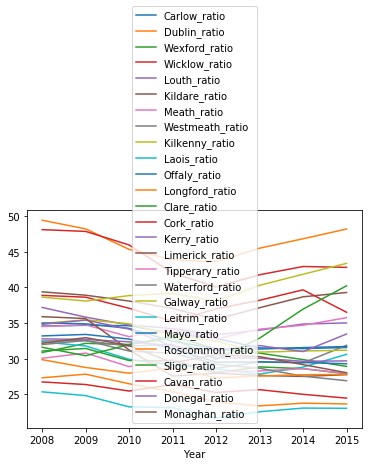

In [48]:
df_rent_income_counties[['Carlow_ratio','Dublin_ratio','Wexford_ratio','Wicklow_ratio',
                         'Louth_ratio','Kildare_ratio','Meath_ratio','Westmeath_ratio',
                         'Kilkenny_ratio','Laois_ratio','Offaly_ratio','Longford_ratio',
                         'Clare_ratio','Cork_ratio','Kerry_ratio','Limerick_ratio',
                         'Tipperary_ratio','Waterford_ratio','Galway_ratio','Leitrim_ratio',
                         'Mayo_ratio','Roscommon_ratio','Sligo_ratio','Cavan_ratio',
                         'Donegal_ratio','Monaghan_ratio']].plot();

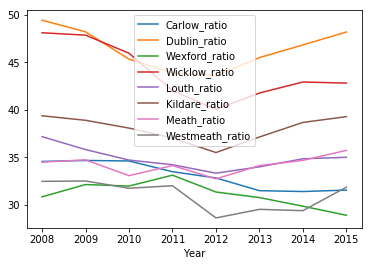

In [49]:
df_rent_income_counties[['Carlow_ratio','Dublin_ratio','Wexford_ratio','Wicklow_ratio',
                         'Louth_ratio','Kildare_ratio','Meath_ratio','Westmeath_ratio']].plot();

In [50]:
dfCountyByNumBeds.keys()

['Two bed', 'Four plus bed', 'All bedrooms', 'Three bed', 'One bed']

In [51]:
dict_df_avg_rent.keys()

['Apartment',
 'Terrace house',
 'Detached house',
 'Other flats',
 'Semi detached house',
 'All property types']

In [145]:
df_rent_income_counties

,Carlow_x,Cavan_x,Clare_x,Cork_x,Donegal_x,Dublin_x,Galway_x,Kerry_x,Kildare_x,Kilkenny_x,...,Tipperary_ratio,Waterford_ratio,Galway_ratio,Leitrim_ratio,Mayo_ratio,Roscommon_ratio,Sligo_ratio,Cavan_ratio,Donegal_ratio,Monaghan_ratio
Year,,,,,,,,,,,,,,,,,,,,,
2008.0,745.00,579.96,696.22,910.85,577.66,1340.04,880.58,679.40,1014.96,776.46,...,30.057824,31.971247,38.628989,25.348016,33.188418,29.862135,31.596149,26.740644,32.782786,32.157753
2009.0,692.66,532.71,642.95,845.58,550.94,1214.71,815.95,651.63,922.50,716.50,...,30.785544,32.558009,38.082533,24.820408,33.399278,28.766983,30.411270,26.372870,32.691885,32.946689
2010.0,651.37,481.70,588.34,770.22,521.28,1076.98,792.32,590.72,824.46,644.92,...,28.887624,31.074984,38.843976,23.242219,32.747560,27.962619,31.977797,25.456467,32.365913,31.846362
2011.0,628.96,459.54,552.90,729.97,501.44,1047.36,741.92,558.69,789.13,604.56,...,29.873311,30.765818,39.166953,23.133231,31.405634,28.698513,32.878247,26.388860,31.807168,29.408152
2012.0,626.96,450.75,534.78,787.26,475.51,1078.83,756.89,565.37,779.79,601.71,...,28.161558,29.217814,38.049013,21.690108,29.503073,27.294697,29.901801,25.259176,30.141672,30.547891
2013.0,600.97,452.06,530.88,814.13,460.32,1115.85,772.95,559.15,789.84,600.29,...,28.274812,28.659555,40.285789,22.552397,29.551577,27.570454,32.873919,25.650007,30.068260,30.283138
2014.0,616.73,449.91,530.79,846.54,457.48,1178.24,810.06,558.69,844.79,612.69,...,28.602747,27.540807,41.840141,23.069738,29.462640,27.743547,36.949895,24.999630,29.632732,29.168056
2015.0,641.47,469.64,543.41,809.15,472.94,1281.06,882.10,628.07,921.90,647.54,...,27.949361,26.906797,43.369525,23.040653,29.282384,27.792193,40.216849,24.466788,29.685532,28.031012


In [146]:
income = ['Carlow_y','Dublin_y','Wexford_y','Wicklow_y',
          'Louth_y','Kildare_y','Meath_y','Westmeath_y',
          'Kilkenny_y','Laois_y','Offaly_y','Longford_y',
          'Clare_ratio','Cork_ratio','Kerry_ratio','Limerick_ratio',
          'Tipperary_ratio','Waterford_ratio','Galway_ratio',
          'Leitrim_ratio','Mayo_ratio','Roscommon_ratio','Sligo_ratio',
          'Cavan_ratio','Donegal_ratio','Monaghan_ratio']

ratios = ['Carlow_ratio','Dublin_ratio','Wexford_ratio','Wicklow_ratio',
          'Louth_ratio','Kildare_ratio','Meath_ratio','Westmeath_ratio',
          'Kilkenny_ratio','Laois_ratio','Offaly_ratio','Longford_ratio',
          'Clare_ratio','Cork_ratio','Kerry_ratio','Limerick_ratio',
          'Tipperary_ratio','Waterford_ratio','Galway_ratio',
          'Leitrim_ratio','Mayo_ratio','Roscommon_ratio','Sligo_ratio',
          'Cavan_ratio','Donegal_ratio','Monaghan_ratio']

dfplot = df_rent_income_counties
dfplot.index = dfplot.index.astype(int);

plt.subplot(2,1,1); 
ax = dfplot['Net Mig'].plot(figsize=(12, 10),marker='o',color='red',markersize=8); 
ax.set_title('Migration and Rental Supply',fontsize=20)
ax.set_ylabel('Net Migration',fontsize=15);
ax.set_xlabel('');
ax.ticklabel_format(useOffset=False, style='plain')

plt.subplot(2,1,2); 
ax = dfplot['Available Properties'].plot(figsize=(12, 10),marker='o',color='orange',markersize=8); 
ax.set_ylabel('Available Rental Properties',fontsize=15);
ax.set_xlabel('Year',fontsize=15);
ax.ticklabel_format(useOffset=False, style='plain')

#plt.legend(loc='best');
#plt.legend(bbox_to_anchor=(0.17, 0.75), loc=8, borderaxespad=0);
#plt.savefig('./Figures/MigrationVsRentalSupply.png')

Index([u'Carlow_x', u'Cavan_x', u'Clare_x', u'Cork_x', u'Donegal_x',
       u'Dublin_x', u'Galway_x', u'Kerry_x', u'Kildare_x', u'Kilkenny_x',
       u'Laois_x', u'Leitrim_x', u'Limerick_x', u'Longford_x', u'Louth_x',
       u'Mayo_x', u'Meath_x', u'Monaghan_x', u'Offaly_x', u'Roscommon_x',
       u'Sligo_x', u'Tipperary_x', u'Waterford_x', u'Westmeath_x',
       u'Wexford_x', u'Wicklow_x', u'DublinRentChange', u'Carlow_y',
       u'Dublin_y', u'Wexford_y', u'Wicklow_y', u'Louth_y', u'Kildare_y',
       u'Meath_y', u'Westmeath_y', u'Kilkenny_y', u'Laois_y', u'Offaly_y',
       u'Longford_y', u'Clare_y', u'Cork_y', u'Kerry_y', u'Limerick_y',
       u'Tipperary_y', u'Waterford_y', u'Galway_y', u'Leitrim_y', u'Mayo_y',
       u'Roscommon_y', u'Sligo_y', u'Cavan_y', u'Donegal_y', u'Monaghan_y',
       u'Carlow_ratio', u'Dublin_ratio', u'Wexford_ratio', u'Wicklow_ratio',
       u'Louth_ratio', u'Kildare_ratio', u'Meath_ratio', u'Westmeath_ratio',
       u'Kilkenny_ratio', u'Laois_ratio', u'

In [56]:
##################################
' Create output file for Tableau '
##################################

' Create new dataframe '
df_avg_rent_for_tableau = pd.DataFrame()

property_types = ['Detached house','Semi detached house','Terrace house','Apartment','Other flats','All property types']
bed_categories = ['One bed','Two bed','Three bed','Four plus bed','All bedrooms']
                  
for propertyType in property_types:
    
    for bedCategory in bed_categories:
        
        print propertyType,bedCategory
        
        ' Extract only county data from dictionary '
        df = dict_df_avg_rent[propertyType][bedCategory][ dict_df_avg_rent[propertyType][bedCategory]['Location'].isin(counties) ]
        df.set_index('Location',inplace=True)
        
        ' Convert from wide to long format '
        df_minor = pd.DataFrame()
        for i in range(len(df)):
            df_county_row = df.iloc[i].to_frame()
            county = df_county_row.columns[0]
            df_county_row['County'] = county
            df_county_row.columns = ['Rent','County']
            df_minor = df_minor.append(df_county_row)
        
        
        ' Add property and bedroom columns '
        df_minor['Property Type'] = propertyType
        df_minor['Number of bedrooms'] = bedCategory
        
        ' Append result to main dataframe '
        df_avg_rent_for_tableau = df_avg_rent_for_tableau.append(df_minor)

        
df_avg_rent_for_tableau.reset_index(inplace=True)
df_avg_rent_for_tableau.columns = ['Year','Rent','County','Property Type','Number of Bedrooms']
#df_avg_rent_for_tableau.set_index('Year',inplace=True)
df_avg_rent_for_tableau.to_csv('./Figures/avgCountyRentForTableau.csv')


Detached house One bed
Detached house Two bed
Detached house Three bed
Detached house Four plus bed
Detached house All bedrooms
Semi detached house One bed
Semi detached house Two bed
Semi detached house Three bed
Semi detached house Four plus bed
Semi detached house All bedrooms
Terrace house One bed
Terrace house Two bed
Terrace house Three bed
Terrace house Four plus bed
Terrace house All bedrooms
Apartment One bed
Apartment Two bed
Apartment Three bed
Apartment Four plus bed
Apartment All bedrooms
Other flats One bed
Other flats Two bed
Other flats Three bed
Other flats Four plus bed
Other flats All bedrooms
All property types One bed
All property types Two bed
All property types Three bed
All property types Four plus bed
All property types All bedrooms
